<a href="https://colab.research.google.com/github/nikbizkit/MMO/blob/main/LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выполнил: Бакланов Н.В. ИУ5-23М

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [67]:
data = pd.read_csv('data.csv')
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [68]:
data.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [69]:
data.isnull().sum()

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64

In [70]:
data = data.dropna(axis=0, how='any')
data.isnull().sum()

R_fighter       0
B_fighter       0
Referee         0
date            0
location        0
               ..
R_Height_cms    0
R_Reach_cms     0
R_Weight_lbs    0
B_age           0
R_age           0
Length: 144, dtype: int64

In [71]:
date = LabelEncoder()
date_transform = date.fit_transform(data['R_fighter'])

In [72]:
data['R_fighter'].unique()

array(['Adrian Yanez', 'Trevin Giles', 'Marion Reneau', ...,
       'Evan Tanner', 'Frank Trigg', 'Jens Pulver'], dtype=object)

In [73]:
np.unique(date_transform)

array([   0,    1,    2, ..., 1026, 1027, 1028])

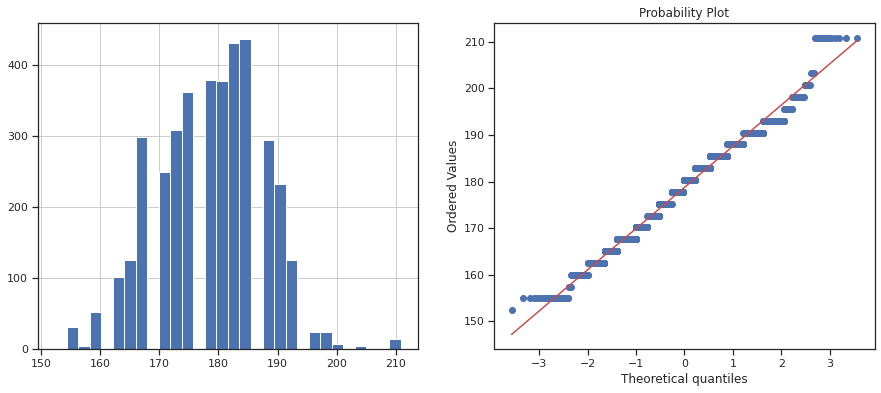

In [77]:
diagnostic_plots(data, 'R_Height_cms')

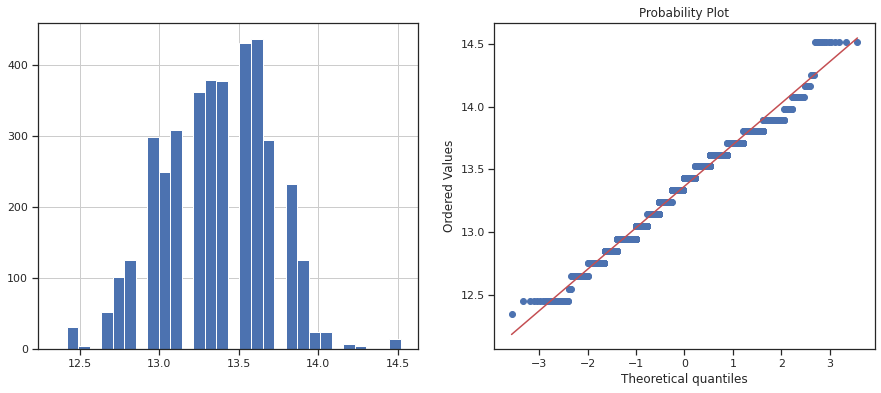

In [78]:
data['R_Height_cms_sqr'] = data['R_Height_cms']**(1/2)
diagnostic_plots(data, 'R_Height_cms_sqr')

Оптимальное значение λ = 1.4820380361237178


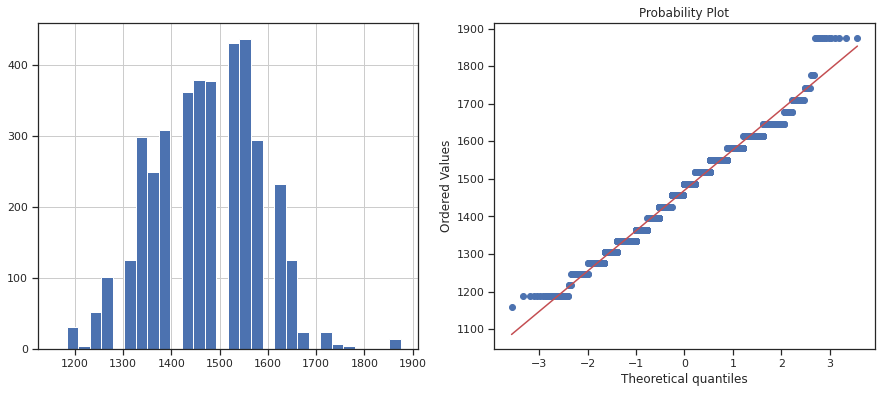

In [79]:
data['R_Height_cms_boxcox'], param = stats.boxcox(data['R_Height_cms'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'R_Height_cms_boxcox')